In [1]:
# conf inicial
import os
import sys
from pathlib import Path

from animaloc_improved.tools.infer_metrics import eval_image

current_dir = Path.cwd()
if current_dir.name == "notebooks":
    os.chdir("../")
    sys.path.append("./")

c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This

## Clase 1

Loading model from: data/models/herdnet_v2_hn/latest_model.pth
Found 11 ground truth annotations for S_07_05_16_DSC00402_85.JPG
Making predictions for: S_07_05_16_DSC00402_85.JPG
Initial GPU memory: 0.00 MB


c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\albumentations\core\composition.py:331: UserWarning: Got processor for keypoints, but no transform to process it.
  self._set_keys()


 [1/1] eta: 0:00:00  time: 0.3737 data: 0.0136 max mem: 226
 Total time: 0:00:00 (0.3758 s / it)

PERFORMANCE METRICS
Total execution time: 0.455 seconds
Inference time: 0.407 seconds
Current CPU Memory: 0.75 MB
Peak CPU Memory: 7.32 MB
GPU Memory used: 72.90 MB
Peak GPU Memory: 226.48 MB


c:\Users\aleap\MAIA\repositorios\proyecto-de-grado\.venv\Lib\site-packages\animaloc\eval\metrics.py:315: RuntimeWarning: invalid value encountered in divide
  recalls = sorted_table[:,2] / n_gt


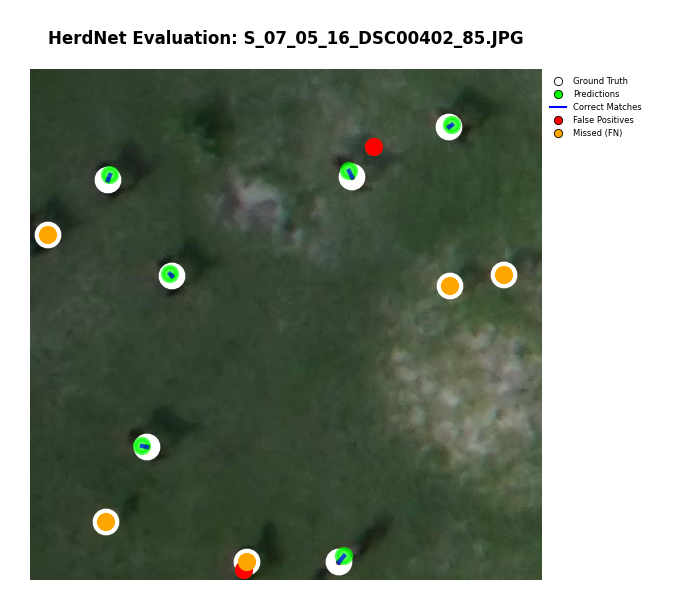


EVALUATION RESULTS
Ground Truth Points: 11
Predicted Points: 8
True Positives: 6
False Positives: 2
False Negatives: 5
Precision: 0.750
Recall: 0.545
F1-Score: 0.632

PER-CLASS BREAKDOWN:
----------------------------------------
Alcelaphinae: GT=11, Pred=7, TP=6
Waterbuck: GT=0, Pred=1, TP=0

Ground Truth Data:
                          images    x    y  labels
2218  S_07_05_16_DSC00402_85.JPG  419   58       1
2219  S_07_05_16_DSC00402_85.JPG  322  108       1
2220  S_07_05_16_DSC00402_85.JPG  474  206       1
2221  S_07_05_16_DSC00402_85.JPG  420  217       1
2222  S_07_05_16_DSC00402_85.JPG  309  493       1
2223  S_07_05_16_DSC00402_85.JPG  217  493       1
2224  S_07_05_16_DSC00402_85.JPG  117  378       1
2225  S_07_05_16_DSC00402_85.JPG   76  453       1
2226  S_07_05_16_DSC00402_85.JPG  142  207       1
2227  S_07_05_16_DSC00402_85.JPG   78  111       1
2228  S_07_05_16_DSC00402_85.JPG   18  166       1

Predictions:
                       images  labels    scores   dscores   

In [2]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "S_07_05_16_DSC00402_85.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

## Clase 2

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "S_07_05_16_DSC00560_53.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

## Clase 3

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "S_07_05_16_DSC00416_131.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

## Clase 4

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "S_07_05_16_DSC00422_125.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

## Clase 5

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "S_07_05_16_DSC00605_23.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

## Clase 6

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "31b98a27c67a87a50b755da8f3dc8d45df41e228_124.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

## Clase 3 y 4

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "S_07_05_16_DSC00415_143.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold)

## Clase 1 y 3

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/patches-512-ol-160-m01/test_points_gt.csv"
image_root = "data/patches-512-ol-160-m01/test/"
image_name = "S_07_05_16_DSC00485_156.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold)

## Misma imagen full - tres modelos

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2/latest_model.pth"
csv_file = "data/gt-preprocessed/csv/test_big_size_A_B_E_K_WH_WB-points.csv"
image_root = "data/test"
image_name = "S_07_05_16_DSC00402.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v2_hn/latest_model.pth"
csv_file = "data/gt-preprocessed/csv/test_big_size_A_B_E_K_WH_WB-points.csv"
image_root = "data/test"
image_name = "S_07_05_16_DSC00402.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)

In [ ]:
%matplotlib inline
# Create visualization
model_path = "data/models/herdnet_v3/latest_model.pth"
csv_file = "data/gt-preprocessed/csv/test_big_size_A_B_E_K_WH_WB-points.csv"
image_root = "data/test"
image_name = "S_07_05_16_DSC00402.JPG"
device = "cuda"
threshold = 15
eval_image(model_path, csv_file, image_root, image_name, device, threshold, show_labels=False)